In [1]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib.font_manager as fm
%matplotlib inline

In [2]:
plt.style.use('bmh')
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [3]:
family = 'Arial'
title_font = fm.FontProperties(family=family, style='normal', size=18, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=14, weight='normal', stretch='normal')

In [4]:
data_types = {'zip':str, 'block_fips':str, 'tract_fips':str}
df = pd.read_csv('datasets/locations-final-cleaned.csv', converters=data_types)
list(df.columns)

['address',
 'city',
 'id',
 'name',
 'state',
 'type',
 'x',
 'y',
 'zip',
 'first_appearance',
 'final_appearance',
 'block_fips',
 'tract_fips']

In [5]:
df['tract_fips'] = df['tract_fips'].str.zfill(11)

In [6]:
# how many states are in the dataset
len(df['state'].unique())

51

In [7]:
# what states have the most beer locations
df['state'].value_counts().head()

CA    707
CO    310
OR    303
WA    285
MI    228
Name: state, dtype: int64

In [8]:
# only keep the rows that are still open as of 2015
df = df[df['final_appearance']==2015]

In [9]:
df['final_appearance'].value_counts()

2015    4044
Name: final_appearance, dtype: int64

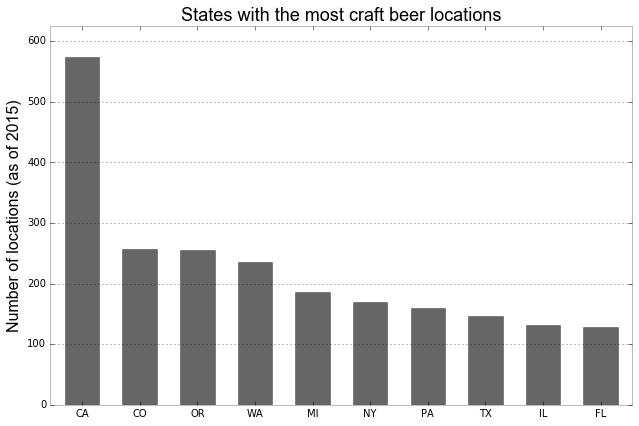

In [10]:
# plot a histogram
countdata = df['state'].value_counts().head(10)

ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.6, 
                    alpha=0.6, 
                    color='k',
                    edgecolor='k')

ax.set_xticks(map(lambda x: x, range(0, len(countdata))))
ax.set_xticklabels(countdata.index, rotation=0, rotation_mode='anchor', ha='center')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

ax.set_axis_bgcolor('#ffffff')   
ax.set_title('States with the most craft beer locations', font_properties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of locations (as of 2015)', font_properties=label_font)
ax.set_ylim(0, 625)

fig = plt.gcf()
fig.tight_layout()
fig.savefig('images/states-beer-locations.png', dpi=300)

plt.show()

In [11]:
df['type'].value_counts()

Brewery          2047
BrewPub          1723
BrewHouse         269
BrewonPremise       3
Brewpub             2
Name: type, dtype: int64

In [12]:
breweries = df[df['type']=='Brewery']
len(breweries)

2047

In [13]:
brewpubs = df[~(df['type']=='Brewery')]
len(brewpubs)

1997

In [14]:
counts = pd.DataFrame({'Breweries' : breweries['state'].value_counts(), 
                       'Brewpubs' : brewpubs['state'].value_counts(),
                       'Total' : df['state'].value_counts()})
counts = counts.sort_values(by='Total', ascending=False)
counts.head()

,Breweries,Brewpubs,Total
CA,261,312,573
CO,142,115,257
OR,84,172,256
WA,136,99,235
MI,79,107,186


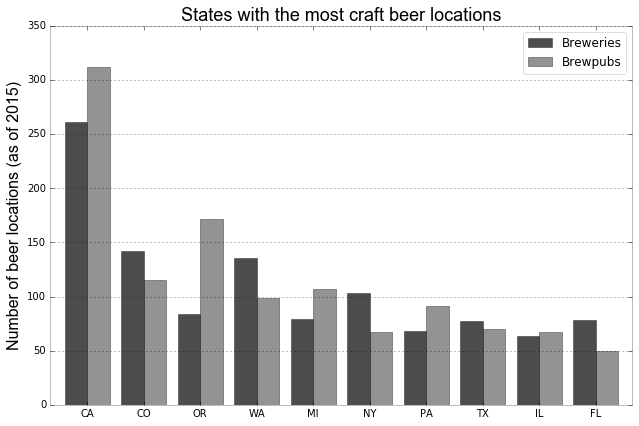

In [15]:
# plot a histogram
countdata = counts[['Breweries', 'Brewpubs']].head(10)
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.8, 
                    alpha=0.7, 
                    color=['k','#666666'],
                    edgecolor='k')

ax.set_xticks(map(lambda x: x, range(0, len(countdata))))
ax.set_xticklabels(countdata.index, rotation=0, rotation_mode='anchor', ha='center')
ax.xaxis.grid(False)
ax.yaxis.grid(True)

legend_frame = ax.get_legend().get_frame()
legend_frame.set_facecolor('white')

ax.set_axis_bgcolor('#ffffff')
ax.set_title('States with the most craft beer locations', font_properties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of beer locations (as of 2015)', font_properties=label_font)
ax.set_ylim(0, 350)

fig = plt.gcf()
fig.tight_layout()
fig.savefig('images/states-beer-locations-type.png', dpi=300)

plt.show()

In [16]:
# what tracts have the most beer locations
tracts = df['tract_fips'].value_counts().head(2).index
df[df['tract_fips'].isin(tracts)][['city','tract_fips']]

,city,tract_fips
23,San Diego,06073008350
109,San Diego,06073008350
282,San Diego,06073008350
659,Denver,08031001600
826,Denver,08031001600
1322,Denver,08031001600
1613,Denver,08031001600
1754,Denver,08031001600
2040,Denver,08031001600
2193,San Diego,06073008350


In [17]:
# how many locations made their first or their final appearances in each year?
pd.DataFrame({'first_appearance' : df['first_appearance'].value_counts(), 
              'final_appearance' : df['final_appearance'].value_counts()})

,final_appearance,first_appearance
2005,NaN,752
2006,NaN,245
2007,NaN,105
2008,NaN,164
2009,NaN,152
2010,NaN,118
2011,NaN,203
2012,NaN,269
2013,NaN,451
2014,NaN,620
